In [29]:
# Import necessary libraries
import os
import zipfile
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [30]:
# Define paths to the datasets
zip_path = 'C:\\Users\\sahar\\OneDrive\\Desktop\\sem 7\\Deep Learning\\face detection\\dataset\\dataset.zip'
extract_path = 'C:\\Users\\sahar\\OneDrive\\Desktop\\sem 7\\Deep Learning\\face detection\\dataset\\dataset'
os.makedirs(extract_path, exist_ok=True)

In [31]:
# Extract the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [32]:
# Define the data generators
train_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)

In [33]:
train_generator = train_datagen.flow_from_directory(
    extract_path,
    target_size=(64, 64),  # Adjust the target size as needed
    batch_size=32,
    class_mode='binary',
    subset='training'
)

Found 3140 images belonging to 2 classes.


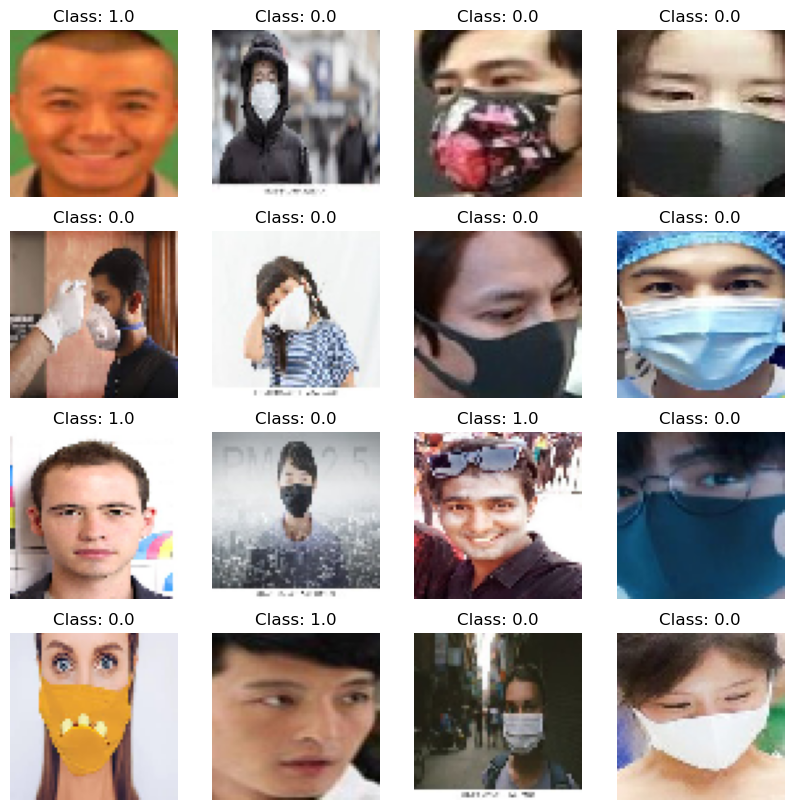

In [34]:
# Display samples from the training generator
import matplotlib.pyplot as plt

# Generate a batch of samples from the training generator
batch = train_generator.next()

# Display the first 16 images and labels in the batch
images, labels = batch

# Plot the images with labels
plt.figure(figsize=(10, 10))
for i in range(min(len(images), 16)):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[i]}')
    plt.axis('off')

plt.show()

In [35]:
validation_generator = train_datagen.flow_from_directory(
    extract_path,
    target_size=(64, 64),  # Adjust the target size as needed
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 785 images belonging to 2 classes.


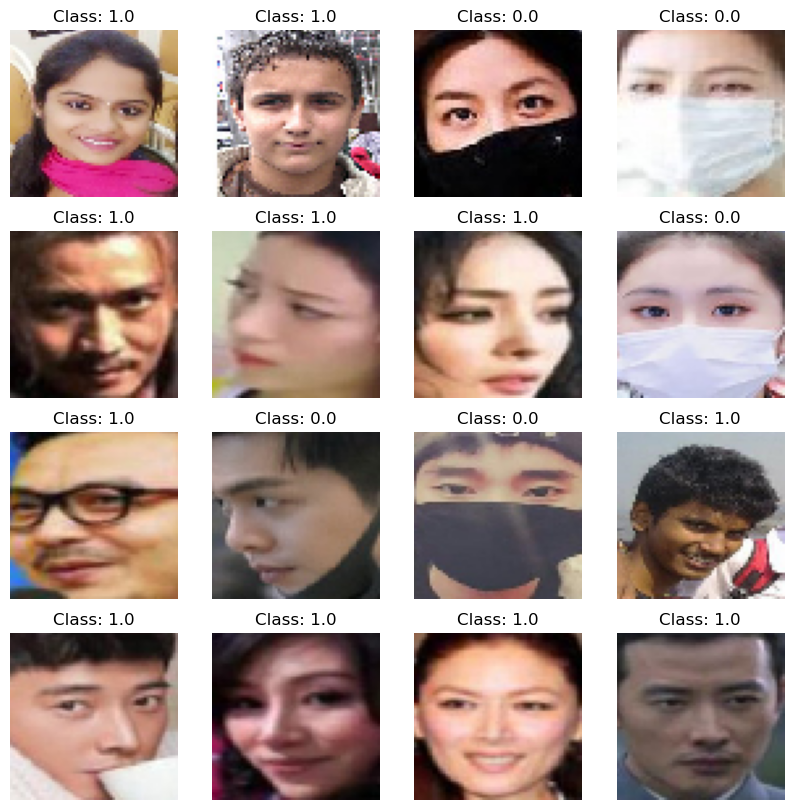

In [36]:
# Display samples from the training generator
import matplotlib.pyplot as plt

# Generate a batch of samples from the training generator
batch = validation_generator.next()

# Display the first 16 images and labels in the batch
images, labels = batch

# Plot the images with labels
plt.figure(figsize=(10, 10))
for i in range(min(len(images), 16)):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[i]}')
    plt.axis('off')

plt.show()

In [37]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [62]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 31, 31, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 12544)             0         
                                                                 
 dense_10 (Dense)            (None, 128)              

In [38]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
# Train the model
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
99/99 [==============================] - 41s 405ms/step - loss: 0.3517 - accuracy: 0.8535 - val_loss: 0.3273 - val_accuracy: 0.8675
Epoch 2/10
99/99 [==============================] - 24s 240ms/step - loss: 0.1997 - accuracy: 0.9252 - val_loss: 0.1800 - val_accuracy: 0.9363
Epoch 3/10
99/99 [==============================] - 23s 235ms/step - loss: 0.1331 - accuracy: 0.9455 - val_loss: 0.1273 - val_accuracy: 0.9605
Epoch 4/10
99/99 [==============================] - 24s 243ms/step - loss: 0.1046 - accuracy: 0.9605 - val_loss: 0.1595 - val_accuracy: 0.9414
Epoch 5/10
99/99 [==============================] - 25s 249ms/step - loss: 0.0748 - accuracy: 0.9736 - val_loss: 0.1583 - val_accuracy: 0.9414
Epoch 6/10
99/99 [==============================] - 30s 302ms/step - loss: 0.0517 - accuracy: 0.9815 - val_loss: 0.2064 - val_accuracy: 0.9414
Epoch 7/10
99/99 [==============================] - 30s 298ms/step - loss: 0.0432 - accuracy: 0.9850 - val_loss: 0.1750 - val_accuracy: 0.9490

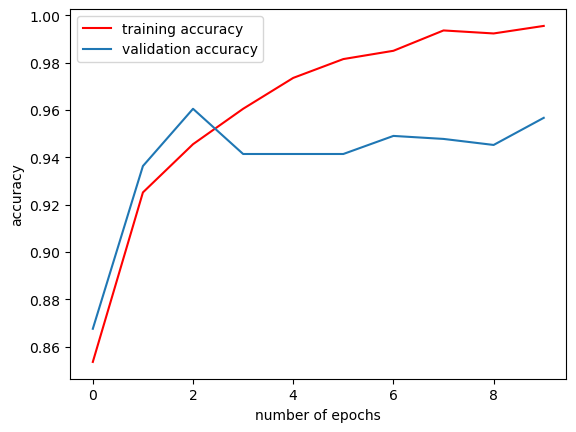

In [40]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('number of epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

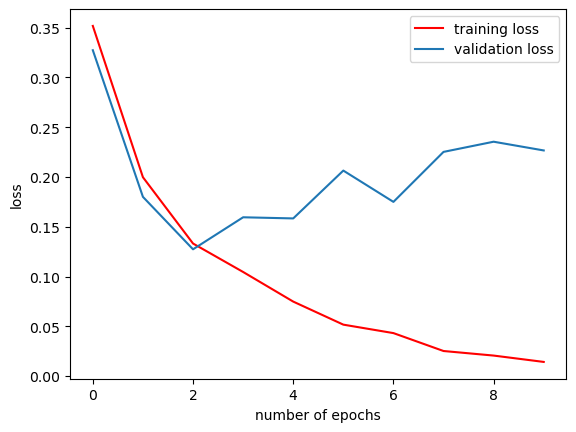

In [41]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [48]:
model.save('C:\\Users\\sahar\\OneDrive\\Desktop\\sem 7\\Deep Learning\\face detection\\mask_detection_model.keras')

In [49]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

In [50]:
model = tf.keras.models.load_model('C:\\Users\\sahar\\OneDrive\\Desktop\\sem 7\\Deep Learning\\face detection\\mask_detection_model.keras')

In [51]:
# Haarcascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [61]:
def predict_mask(frame):
    # Preprocess the frame
    frame = cv2.resize(frame, (64, 64))  # Resize the frame to match the model's input size
    frame = np.expand_dims(frame, axis=0) / 255.0

    # Make the prediction
    prediction = model.predict(frame)

    # Return the result
    label = "With Mask" if prediction[0, 0] > 0.5 else "Without Mask"
    confidence = prediction[0, 0]

    return label, confidence


# Open the webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()

    if not ret:
        print("Error: Couldn't read frame from the camera.")
        break

    # Convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        # Extract the face region
        face_roi = frame[y:y + h, x:x + w]

        # Predict if the person is wearing a mask and get the confidence
        mask_label, mask_confidence = predict_mask(face_roi)

        # Set a threshold for confidence
        threshold = 0.80

        # Change the color of the rectangle based on the confidence level
        if mask_confidence < threshold:
            color = (0, 0, 255)  # Red for "Without Mask"
        else:
            color = (0, 255, 0)  # Green for "With Mask"

        # Display the result on the frame
        accuracy_text = f'Accuracy: {mask_confidence:.2%}'
        cv2.putText(frame, mask_label, (x, y - 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)
        cv2.putText(frame, accuracy_text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)

    # Display the frame
    cv2.imshow('Mask Detection', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close the window
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 18ms/step
